# 1. Загрузите первые 400 строк прилагающегося датасета diabetes.csv.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML4.3%20diagnostics/diabetes.csv',nrows=400)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2. Сделайте количественное описание датасета: число признаков, статистику по признакам.

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,400.000000,400.00000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,3.952500,121.24000,69.060000,20.327500,81.250000,32.10775,0.487915,33.092500,0.380000
std,3.369514,32.68437,19.011575,15.599796,121.597254,8.13714,0.349619,11.325396,0.485994
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.078000,21.000000,0.000000
25%,1.000000,100.00000,64.000000,0.000000,0.000000,27.30000,0.250500,24.000000,0.000000
50%,3.000000,116.50000,71.000000,23.000000,36.000000,32.00000,0.381000,29.000000,0.000000
75%,6.000000,143.00000,80.000000,32.000000,128.250000,36.60000,0.652500,40.000000,1.000000
max,17.000000,197.00000,122.000000,60.000000,846.000000,67.10000,2.329000,69.000000,1.000000


# 3. Отделите целевую переменную Outcome.

In [4]:
target = 'Outcome'
y = df[target]
X = df.drop(columns=[target])
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
395,2,127,58,24,275,27.7,1.600,25
396,3,96,56,34,115,24.7,0.944,39
397,0,131,66,40,0,34.3,0.196,22
398,3,82,70,0,0,21.1,0.389,25


# 4. Разделите данные на обучающую и валидационную выборки при помощи train_test_split из библиотеки sklearn.model_selection в соотношении 80-20 (для этого укажите параметр test_size=0.2) с перемешиванием, указав значение параметра random_state=42.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [6]:
X_train.shape, X_test.shape

((320, 8), (80, 8))

# 5. Создайте объект DecisionTreeClassifier(random_state=1). Обучите модель на обучающих (трейновых) данных. Сделайте предсказание на трейновом и валидационном наборе признаков. Выведите значения метрики f1-scoreдля трейнового и валидационного наборов данных. По полученным значениям метрик сделайте предположение о переобученности модели.

In [7]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [8]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import f1_score
print("Train f1_score = %.4f" % f1_score(y_train, y_train_pred))
print("Test f1_score = %.4f" % f1_score(y_test, y_pred))

Train f1_score = 1.0000
Test f1_score = 0.6364


Вывод: модель переобучилась

# 6. Произведите кросс-валидацию с использованием функции cross_validate из библиотеки sklearn.model_selection. По полученным данным, постройте график зависимости значений f1-score от набора данных соответствующей итерации. По графику убедитесь в том, что имеет место переобученность модели.

In [10]:
from sklearn.model_selection import cross_validate

In [11]:
cv_metrics = cross_validate(model,X,y,cv=5,scoring='f1_micro',return_train_score=True)

In [12]:
cv_metrics

{'fit_time': array([0.00305176, 0.00234342, 0.00200105, 0.00204301, 0.00204349]),
 'score_time': array([0.00101876, 0.00101471, 0.00226641, 0.0020678 , 0.00241876]),
 'test_score': array([0.6375, 0.7125, 0.725 , 0.625 , 0.6125]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [13]:
f1_train = cv_metrics['train_score'].mean()
f1_test = cv_metrics['test_score'].mean()
print('train f1-score:', f1_train)
print('test f1-score:', f1_test)

train f1-score: 1.0
test f1-score: 0.6625


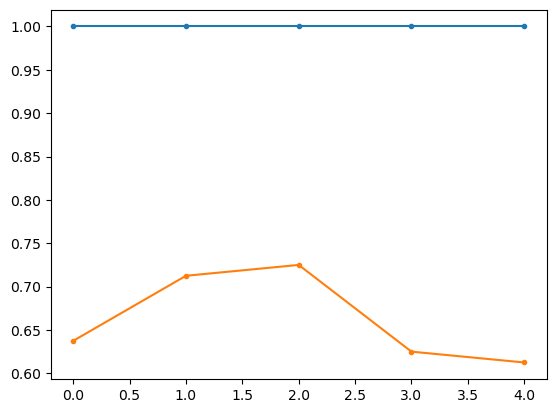

In [14]:
from matplotlib import pyplot as plt
plt.plot(cv_metrics['train_score'], label='train', marker='.')
plt.plot(cv_metrics['test_score'], label='test', marker='.')

Вывод: кривые далеко друг от друга, значит есть переобучение

# 7. Для борьбы с переобучением регуляризуйте модель DecisionTreeClassifier, уменьшив глубину дерева, указав параметр регуляризации max_depth=3.

In [15]:
model_3 = DecisionTreeClassifier(random_state=1, max_depth=3)
model_3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [16]:
y_train_pred = model_3.predict(X_train)
y_pred = model_3.predict(X_test)
print("Train f1_score = %.4f" % f1_score(y_train, y_train_pred))
print("Test f1_score = %.4f" % f1_score(y_test, y_pred))

Train f1_score = 0.5059
Test f1_score = 0.4783


# 8. Снова проделайте пункт 6 с учётом регуляризации и убедитесь по графику в том, что модель больше не является переобученной.

In [17]:
cv_metrics = cross_validate(model_3,X,y,cv=5,scoring='f1_micro',return_train_score=True)
f1_train = cv_metrics['train_score'].mean()
f1_test = cv_metrics['test_score'].mean()
print('train f1-score:', f1_train)
print('test f1-score:', f1_test)

train f1-score: 0.76
test f1-score: 0.7


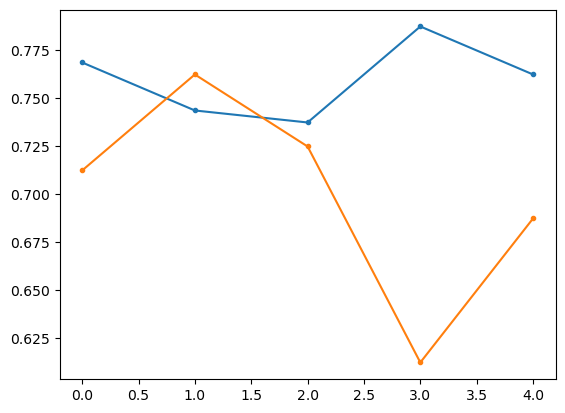

In [18]:
from matplotlib import pyplot as plt
plt.plot(cv_metrics['train_score'], label='train', marker='.')
plt.plot(cv_metrics['test_score'], label='test', marker='.')

# 9. Теперь рассмотрите проблему недообучения модели. Для борьбы с недообучением модели добавьте данные. Для этого загрузите все строки датасета diabetes.csv.

In [19]:
df_all = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML4.3%20diagnostics/diabetes.csv')
df_all.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
df_all.shape

(768, 9)

In [21]:
y = df_all[target]
X = df_all.drop(columns=[target])
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [23]:
y_train_pred = model_3.predict(X_train)
y_pred = model_3.predict(X_test)
print("Train f1_score = %.4f" % f1_score(y_train, y_train_pred))
print("Test f1_score = %.4f" % f1_score(y_test, y_pred))

Train f1_score = 0.5049
Test f1_score = 0.4938


In [24]:
cv_metrics = cross_validate(model_3,X,y,cv=5,scoring='f1_micro',return_train_score=True)
f1_train = cv_metrics['train_score'].mean()
f1_test = cv_metrics['test_score'].mean()
print('train f1-score:', f1_train)
print('test f1-score:', f1_test)

train f1-score: 0.7744169910754481
test f1-score: 0.7291656056361939


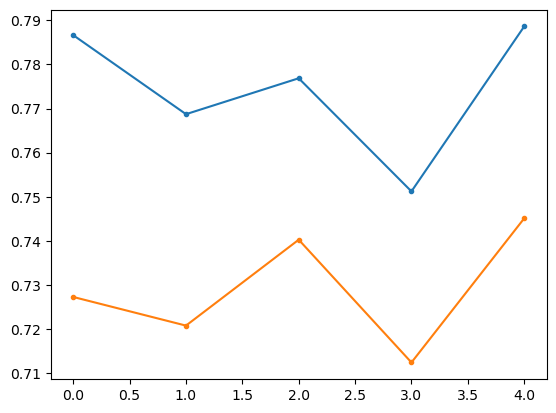

In [25]:
from matplotlib import pyplot as plt
plt.plot(cv_metrics['train_score'], label='train', marker='.')
plt.plot(cv_metrics['test_score'], label='test', marker='.')

# 10. Обучите модель DecisionTreeClassifier(random_state=1, max_depth=3) на всех данных и убедитесь в том, что значение метрики f1-score улучшилось.

In [26]:
model_3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [27]:
y_train_pred = model_3.predict(X_train)
y_pred = model_3.predict(X_test)
print("Train f1_score = %.4f" % f1_score(y_train, y_train_pred))
print("Test f1_score = %.4f" % f1_score(y_test, y_pred))

Train f1_score = 0.6584
Test f1_score = 0.6476


# Задания для самостоятельного выполнения

# 1. Повторите диагностику модели классификации синтетических данных с использованием других метрик эффективности - precision, recall, F1. Как изменились результаты?


In [28]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [29]:
# !pip install yellowbrick

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

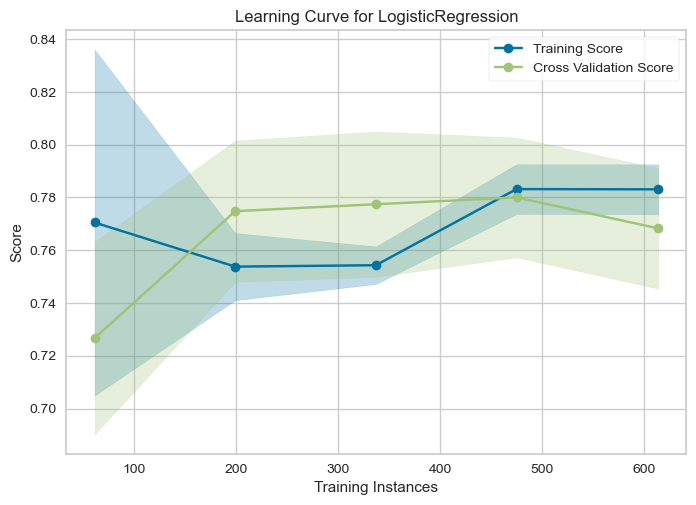

In [30]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    LogisticRegression()
).fit(X, y).show()

In [31]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.metrics import precision_score, recall_score, f1_score

# создание модели
model = LogisticRegression()

# обучение модели на трейновой выборке
model.fit(X_train, y_train)

# предсказание на трейновом и тестовом наборах признаков
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# вычисление метрик
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Train precision: ", train_precision)
print("Test precision: ", test_precision)

print("Train recall: ", train_recall)
print("Test recall: ", test_recall)

print("Train f1-score: ", train_f1)
print("Test f1-score: ", test_f1)

Train precision:  0.8228438228438228
Test precision:  0.8089887640449438
Train recall:  0.8506024096385543
Test recall:  0.8181818181818182
Train f1-score:  0.8364928909952607
Test f1-score:  0.8135593220338984


# 2. Повторите диагностику модели регрессии с использованием других видов моделей:

## метода опорных векторов (исследуйте влияние параметра С на недо-и переобучение)

## метода ближайших соседей (исследуйте влияние количества соседей)

## метода решающих деревьев (гиперпараметры по вашему выбору)

# 3. Дополните анализ датасета Бостон исследованием модели лассо - постройте кривые обучения для переобученной, недообученной и качественной модели, найдите оптимальное значение параметра регуляризации в модели лассо.

# 4. В одном из двух первых примеров используйте модель ElasticNet и исследуйте влияние сразу двух параметров регуляризации на эффективность модели.

# 5. Дополните анализ дерева решений из третьего примера: постройте кривые регуляризации для полного датасета, найдите оптимальную глубину дерева и оцените качество такой модели на всем датасете. Повторите данный анализ используя в качестве метрики эффективности F1.

# 6. Повторите анализ на других реальных датасетах из репозитория OpenML: